In [1]:
#import library
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from google.colab import files
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import t

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#upload file
upload = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [3]:
#read dataframe
df = pd.read_csv('/content/vgames2.csv' )
#df.drop(df.columns[0], inplace= True)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
want = pd.DataFrame(df['Genre'].value_counts())
want

,Genre
Action,3305
Sports,2341
Misc,1734
Role-Playing,1483
Shooter,1308
Adventure,1280
Racing,1243
Platform,884
Simulation,865
Fighting,847


In [4]:
# 각 컬럼 별 어떤 값이 있는지 확인 
def check(value):
  for i in ['Year','Platform', 'Genre', 'Publisher']:
    print(df[i].value_counts(),'\n')
    print(df[i].unique(),'\n')
    print('값들의 수: ',len(df[i].unique()),'\n')

In [5]:
check(df)

2009.0    1445
2008.0    1439
2010.0    1275
2007.0    1213
2011.0    1172
          ... 
2018.0       1
2020.0       1
86.0         1
2019.0       1
94.0         1
Name: Year, Length: 67, dtype: int64 

[2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03 1.984e+03 1.998e+03 2.016e+03 1.985e+03
 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03 1.987e+03
 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03 1.991e+03
 1.983e+03 1.988e+03 1.981e+03       nan 3.000e+00 1.989e+03 9.600e+01
 6.000e+00 8.000e+00 1.986e+03 1.000e+00 5.000e+00 1.978e+03 4.000e+00
 1.000e+01 9.800e+01 7.000e+00 1.600e+01 8.600e+01 1.400e+01 9.500e+01
 1.980e+03 2.017e+03 1.979e+03 2.020e+03 2.018e+03 2.000e+00 1.300e+01
 0.000e+00 1.200e+01 1.977e+03 2.019e+03 9.400e+01] 

값들의 수:  68 

DS      2163
PS2     2161
PS3     1330
Wii     1325
X360    1265
PSP     1213
PS      1196

In [6]:
# dropna 결측치가 가장 많은 year의 경우 전체 데이터의 10% 넘지 않아 전부 삭제
df.dropna(inplace = True)

#check the result of dropna
df.isna().sum()
#데이터 타입 변경을 위한 함수 설정 
#def tonum(value):

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [7]:
# make function to convert dtype
def to_num(string):
  if 'M' in string:
    return float(string.replace('M','')) * 1000
  elif 'K' in string:
    return float(string.replace('K','')) 
  else:
    return float(string) * 1000

# apply function to df 
df['NA_Sales'] = df['NA_Sales'].apply(to_num) 
df['EU_Sales'] = df['EU_Sales'].apply(to_num)
df['JP_Sales'] = df['JP_Sales'].apply(to_num)
df['Other_Sales'] = df['Other_Sales'].apply(to_num)

# create new feature Gross_Sales
df['Gross_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


In [8]:
# to correct real year set 
def correct_year(value):
  if value / 10 <= 2:
    return value + 2000
  elif value / 10 <= 10:
    return value + 1900
  else: 
    return value

# to change dtype of year 
def num_year(value):
  if type(value) == 'Object':
    return int(value)

df['Year'] = df['Year'].apply(int)
df['Year'] = df['Year'].apply(correct_year)



In [9]:
# check descriptive statistics
df.describe()

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Gross_Sales
count,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000
mean,8297.213805,2006.389094,264.681264,146.557288,77.465276,48.009341,536.713168
std,4790.637920,5.873598,817.979994,505.206784,307.233231,188.489669,1554.115023
min,1.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4151.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,8297.000000,2007.000000,80.000000,20.000000,0.000000,10.000000,170.000000
75%,12445.500000,2010.000000,240.000000,110.000000,40.000000,40.000000,470.000000
max,16598.000000,2020.000000,41490.000000,29020.000000,10220.000000,10570.000000,82740.000000


In [10]:
# compare among different genre 

genre = df.groupby(by = 'Genre').mean().sort_values(by = 'NA_Sales', ascending = False)
genre

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Gross_Sales
Genre,,,,,,,
Platform,8048.660998,2003.817460,506.167800,228.015873,148.129252,58.424036,940.736961
Shooter,8032.528331,2005.877489,445.566616,239.678407,29.310873,78.598775,793.154671
Sports,8368.927288,2005.468777,290.722840,160.791275,57.848589,57.557742,566.920445
Racing,8320.822061,2004.849436,287.592593,190.893720,45.410628,62.077295,585.974235
Action,8270.398120,2007.852638,265.166768,158.302001,47.738023,56.525167,527.731959
Fighting,8477.093491,2004.613018,262.165680,118.485207,103.360947,42.840237,526.852071
Misc,8497.017585,2007.307151,235.920281,123.253224,61.682298,43.335287,464.191090
Role-Playing,8441.878296,2007.051386,216.051386,124.117647,233.171062,38.512508,611.852603
Puzzle,8111.136915,2005.131716,213.778163,87.902946,98.561525,21.698440,421.941075


In [12]:
#DataFrame to make just a kind of time series
year_sales = df.groupby(by = 'Year').sum().sort_values(by = 'Year', ascending = False)
year_sales

,Unnamed: 0,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Gross_Sales
Year,,,,,,
2020,6907,270.0,0.0,0.0,20.0,290.0
2019,13489,0.0,30.0,0.0,10.0,40.0
2018,7151,10.0,0.0,0.0,0.0,10.0
2017,30653,0.0,0.0,50.0,0.0,50.0
2016,2885630,22660.0,26790.0,13670.0,7750.0,70870.0
2015,5195634,101820.0,96940.0,33430.0,29650.0,261840.0
2014,4844452,131980.0,125630.0,39700.0,40020.0,337330.0
2013,4489439,149660.0,122240.0,43250.0,39140.0,354290.0
2012,5387271,155010.0,118480.0,51640.0,37690.0,362820.0


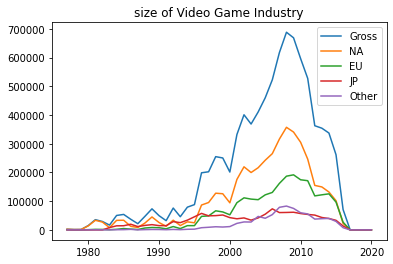

In [13]:
#wanted to check game industry size
plt.plot(year_sales.index, year_sales['Gross_Sales'], label = 'Gross') 
plt.plot(year_sales.index, year_sales['NA_Sales'], label = 'NA')
plt.plot(year_sales.index, year_sales['EU_Sales'], label = 'EU')  
plt.plot(year_sales.index, year_sales['JP_Sales'], label = 'JP')
plt.plot(year_sales.index, year_sales['Other_Sales'], label = 'Other')  
plt.legend()
plt.title('size of Video Game Industry')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


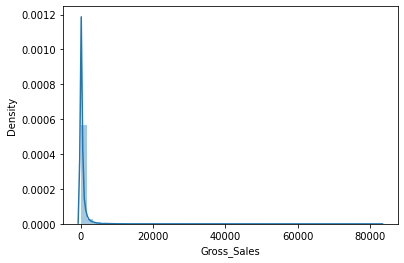

In [14]:
# check distribution of Gross_Sales
sns.distplot(df['Gross_Sales'])

0        3.419952
1        5.646216
2        2.714418
3        3.419952
4        6.299605
           ...   
16593    5.848035
16594    2.154435
16595    9.244335
16596    7.243156
16597    5.539658
Name: Gross_Sales, Length: 16487, dtype: float64




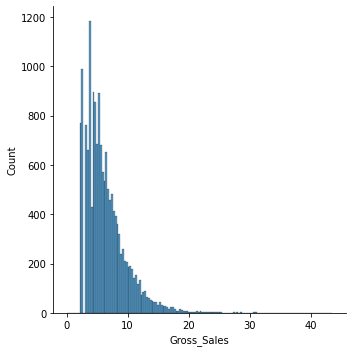

In [15]:
# check distribution of Gross_Sales 
print(np.cbrt(df['Gross_Sales']))
print('\n')
sns.displot(np.cbrt(df['Gross_Sales'])) # it is for making distribution clear

In [16]:
# ANOVA table 
lm = ols('NA_Sales~Other_Sales', df).fit()
anova_table = sm.stats.anova_lm(lm)
anova_table
# p-value 가 0으로 귀무가설 기각 
#통계적으로 4개의 지역의 평균이 모두 같지 않아, 평균 출고량의 우위로 전략 지역 선정 가능 

,df,sum_sq,mean_sq,F,PR(>F)
Other_Sales,1.0,4.445529e+09,4.445529e+09,11128.825123,0.0
Residual,16485.0,6.585110e+09,3.994607e+05,NaN,NaN


In [17]:
# upgrade scipy for one - side T-test
!pip install scipy --upgrade

In [19]:
# 비교 대상 정리 
a = df['NA_Sales']
b = df['EU_Sales']
c = df['JP_Sales']
d = df['Other_Sales']

# one side T - test1 NA & EU
print(stats.ttest_ind(a,b, alternative='greater'))
print('\n')
print(stats.ttest_ind(a,b, alternative='less') )

#다음 결과를 바탕으로 북미지역의 출고량 평균이 유럽보다 통계적으로 유의미하게 크다고 볼 수 있다. 

Ttest_indResult(statistic=15.775985142333486, pvalue=3.645761290352467e-56)


Ttest_indResult(statistic=15.775985142333486, pvalue=1.0)


In [20]:
# one side T - test2 EU & JP 
print(stats.ttest_ind(b, c, alternative='greater'))
print('\n')
print(stats.ttest_ind(b, c , alternative='less') )

# 유럽이 일본 보다 유의미하게 큼 

Ttest_indResult(statistic=15.003642311530635, pvalue=5.1112762221481256e-51)


Ttest_indResult(statistic=15.003642311530635, pvalue=1.0)


In [21]:
# one side T - test3 JP & Other 
print(stats.ttest_ind(c, d, alternative='greater'))
print('\n')
print(stats.ttest_ind(c, d, alternative='less') )
# 일본이 기타 국가보다 출고량 평균이 유의미 하게 큼 
#이를 바탕으로 표적시장을 선정하자면 북미> 유럽> 일본 > 기타로 볼 수 있음

Ttest_indResult(statistic=10.49311903302736, pvalue=5.1001622363464014e-26)


Ttest_indResult(statistic=10.49311903302736, pvalue=1.0)


In [70]:
# 지역을 바꿔보면 각 지역의 다른 장르 선호를 알 수 있다.
df.groupby(by = 'Genre').mean().sort_values(by = 'NA_Sales', ascending = False)

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Gross_Sales
Genre,,,,,,,
Platform,8048.660998,2003.817460,506.167800,228.015873,148.129252,58.424036,940.736961
Shooter,8032.528331,2005.877489,445.566616,239.678407,29.310873,78.598775,793.154671
Sports,8368.927288,2005.468777,290.722840,160.791275,57.848589,57.557742,566.920445
Racing,8320.822061,2004.849436,287.592593,190.893720,45.410628,62.077295,585.974235
Action,8270.398120,2007.852638,265.166768,158.302001,47.738023,56.525167,527.731959
Fighting,8477.093491,2004.613018,262.165680,118.485207,103.360947,42.840237,526.852071
Misc,8497.017585,2007.307151,235.920281,123.253224,61.682298,43.335287,464.191090
Role-Playing,8441.878296,2007.051386,216.051386,124.117647,233.171062,38.512508,611.852603
Puzzle,8111.136915,2005.131716,213.778163,87.902946,98.561525,21.698440,421.941075


In [22]:
# 장르별 트렌드 파악
#파악하려는 장르는 북미평균출고량이 가장 높은 5개 장르 
#Platform Shooter Sports Racing Action

platform = df[df['Genre']== 'Platform']
shooter = df[df['Genre']== 'Shooter']
sports = df[df['Genre']== 'Sports']
racing = df[df['Genre']== 'Racing']
action = df[df['Genre']== 'Action']

# groupby process to make lineplot 
platform_time = platform.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
shooter_time = shooter.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
sports_time = sports.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
racing_time = racing.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
action_time = action.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]

#search another genre
#'Fighting', 'Misc', 'Role-Playing', 'Puzzle', 'Simulation','Strategy'
fighting = df[df['Genre']== 'Fighting']
misc = df[df['Genre']== 'Misc']
role = df[df['Genre']== 'Role-Playing']
puzzle = df[df['Genre']== 'Puzzle']
simulation = df[df['Genre']== 'Simulation']
strategy = df[df['Genre']== 'Strategy']

#groupby
fighting = fighting.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
misc = misc.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
role = role.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
puzzle = puzzle.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
simulation = simulation.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]
strategy = strategy.groupby(by = 'Year')[['NA_Sales']].mean()

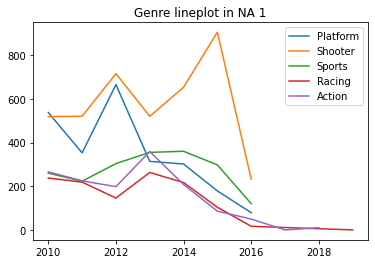

In [23]:
#visualization for genre which show us to check line plot after 2010 in NA
plt.plot(platform_time.index, platform_time['NA_Sales'], label = 'Platform') 
plt.plot(shooter_time.index, shooter_time['NA_Sales'], label = 'Shooter')
plt.plot(sports_time.index, sports_time['NA_Sales'], label = 'Sports')  
plt.plot(racing_time.index, racing_time['NA_Sales'], label = 'Racing')
plt.plot(action_time.index, action_time['NA_Sales'], label = 'Action')
plt.title('Genre lineplot in NA 1')  
plt.legend()
plt.show()

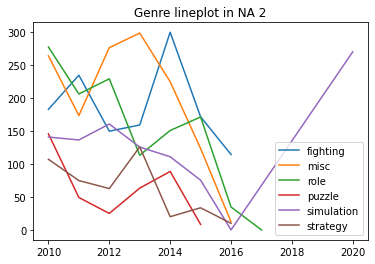

In [24]:
#visualization for genre which show us to check line plot after 2010 in NA
plt.plot(fighting.index, fighting['NA_Sales'], label = 'fighting') 
plt.plot(misc.index, misc['NA_Sales'], label = 'misc')
plt.plot(role.index, role['NA_Sales'], label = 'role')  
plt.plot(puzzle.index, puzzle['NA_Sales'], label = 'puzzle')
plt.plot(simulation.index, simulation['NA_Sales'], label = 'simulation')  
plt.plot(strategy.index, strategy['NA_Sales'], label = 'strategy')  
plt.title('Genre lineplot in NA 2')  
plt.legend()
plt.show()

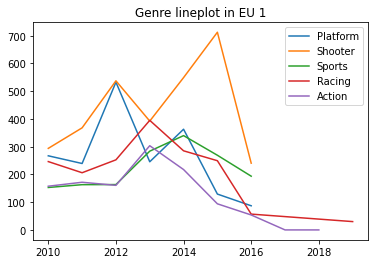

In [49]:
# groupby process to make lineplot 
platform_time = platform.groupby(by = 'Year')[['EU_Sales']].mean().loc['2010':, :]
shooter_time = shooter.groupby(by = 'Year')[['EU_Sales']].mean().loc['2010':, :]
sports_time = sports.groupby(by = 'Year')[['EU_Sales']].mean().loc['2010':, :]
racing_time = racing.groupby(by = 'Year')[['EU_Sales']].mean().loc['2010':, :]
action_time = action.groupby(by = 'Year')[['EU_Sales']].mean().loc['2010':, :]
fighting = fighting.groupby(by = 'Year')[['NA_Sales']].mean().loc['2010':, :]


#visualization for genre which show us to check line plot after 2010 in EU
plt.plot(platform_time.index, platform_time['EU_Sales'], label = 'Platform') 
plt.plot(shooter_time.index, shooter_time['EU_Sales'], label = 'Shooter')
plt.plot(sports_time.index, sports_time['EU_Sales'], label = 'Sports')  
plt.plot(racing_time.index, racing_time['EU_Sales'], label = 'Racing')
plt.plot(action_time.index, action_time['EU_Sales'], label = 'Action')
plt.title('Genre lineplot in EU 1')  
plt.legend()
plt.show()

In [47]:
#visualization for genre which show us to check line plot after 2010 in NA
plt.plot(fighting.index, fighting['EU_Sales'], label = 'fighting') 
plt.plot(misc.index, misc['EU_Sales'], label = 'misc')
plt.plot(role.index, role['EU_Sales'], label = 'role')  
plt.plot(puzzle.index, puzzle['EU_Sales'], label = 'puzzle')
plt.plot(simulation.index, simulation['EU_Sales'], label = 'simulation')  
plt.plot(strategy.index, strategy['EU_Sales'], label = 'strategy')  
plt.title('Genre lineplot in EU 2')  
plt.legend()
plt.show()

KeyError: ignored

In [25]:
#it is to see dataframe only for simulation genre
s1 = df[df['Genre']== 'Simulation']

s1_platform = s1[['Platform']] 
s1_gross = s1[['Gross_Sales']]

In [26]:
# it is for checking which publisher make lots of Sales
s1_publisher= s1.groupby(by = 'Publisher').mean().sort_values(by = 'Gross_Sales', ascending =False)

In [35]:
#try PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA


regions = s1.iloc[:, 6:10]
scaler = StandardScaler()
Z = scaler.fit_transform(regions)
features = pd.DataFrame(Z, columns = ['NA', 'EU', 'JP', 'Other'])
features
#PCA 
pca = PCA(2)
m = pca.fit(Z)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])

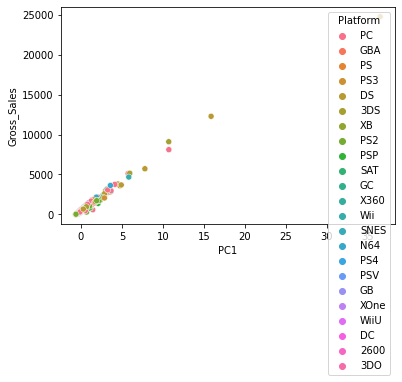

In [36]:
#complete extracted_df and visualization
label1 = pd.concat([s1_platform,s1_gross], axis = 1)
label1 = label1.reset_index()

extracted_df = pd.concat([extracted_df, label1], axis = 1)


sns.scatterplot(x = 'PC1',
            y = 'Gross_Sales',
            data = extracted_df,
            hue = 'Platform')

In [30]:
#checking DF
extracted_df

,PC1,PC2,index,Platform,Gross_Sales
0,-0.599691,-0.045737,6,PC,30.0
1,-0.421736,-0.114898,11,GBA,190.0
2,-0.474911,-0.089073,21,PS,110.0
3,0.504494,-0.425127,53,PS3,700.0
4,-0.266725,0.292076,121,PS,270.0
...,...,...,...,...,...
856,0.130754,-0.325877,16459,DS,550.0
857,-0.622257,-0.002024,16469,PS3,10.0
858,-0.127177,-0.190645,16491,PC,300.0
859,0.291098,-0.331724,16504,DS,670.0


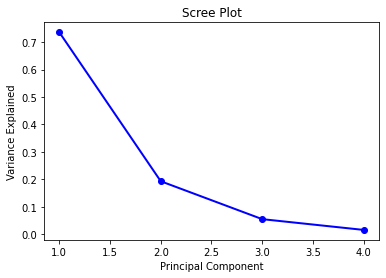

In [33]:
#make scree plot to decide how much PC do we need
pca = PCA(4)
m = pca.fit(Z)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2','PC3','PC4'])

PC_values = np.arange(m.n_components_) + 1
plt.plot(PC_values, m.explained_variance_ratio_, 'o-',linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

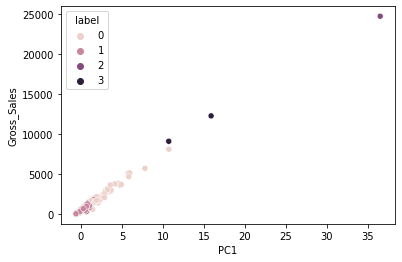

In [37]:
# try K-means Clustering 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 4)
kmeans.fit(extracted_df.iloc[:,:2])

centroids = kmeans.cluster_centers_
extracted_df['label'] = kmeans.labels_
centroids

sns.scatterplot(x = 'PC1',
                y = 'Gross_Sales',
                data = extracted_df,
                hue = 'label')


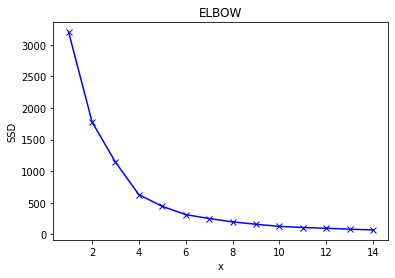

In [38]:
#make elbow plot to decide how much cluster should we make 

SSD = []
x = range(1, 15)
for i in x:
  km = KMeans(n_clusters = i)
  km = km.fit(extracted_df.iloc[:,:2])
  SSD.append(km.inertia_)

plt.plot(x, SSD, 'bx-')
plt.xlabel('x')
plt.ylabel('SSD')
plt.title('ELBOW')
plt.show()



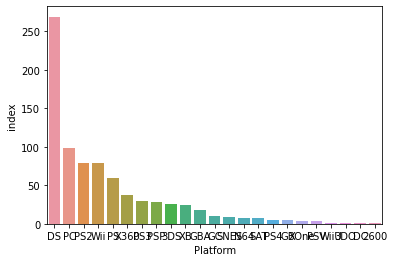

In [39]:
# it may be differnt to PPT slides, Because every time I excute K-means Clustering,
# the labels change
target = extracted_df[(extracted_df['label'] == 1) | (extracted_df['label'] == 2)]
target = target.groupby(by = 'Platform').count().sort_values(by = 'index', ascending = False)

#visualization 
sns.barplot(x = target.index, y = 'index', data = target)

In [40]:
choose_pub = s1.groupby(by = 'Publisher').mean().sort_values(by = 'Gross_Sales',ascending = False)
choose_pub

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Gross_Sales
Publisher,,,,,,,
Nintendo,9431.000000,2005.758621,1024.137931,898.275862,816.206897,202.068966,2940.689655
Sony Computer Entertainment Europe,11274.500000,2002.500000,1470.000000,450.000000,350.000000,175.000000,2445.000000
Maxis,7514.666667,1992.000000,626.666667,440.000000,0.000000,63.333333,1130.000000
Hudson Entertainment,716.000000,1997.000000,0.000000,0.000000,740.000000,50.000000,790.000000
Electronic Arts,8478.732759,2006.431034,379.568966,308.879310,7.586207,75.172414,771.206897
...,...,...,...,...,...,...,...
Masque Publishing,5352.000000,2011.000000,10.000000,0.000000,0.000000,0.000000,10.000000
Happinet,9719.000000,2015.000000,0.000000,0.000000,10.000000,0.000000,10.000000
Paradox Development,10632.000000,2016.000000,0.000000,10.000000,0.000000,0.000000,10.000000


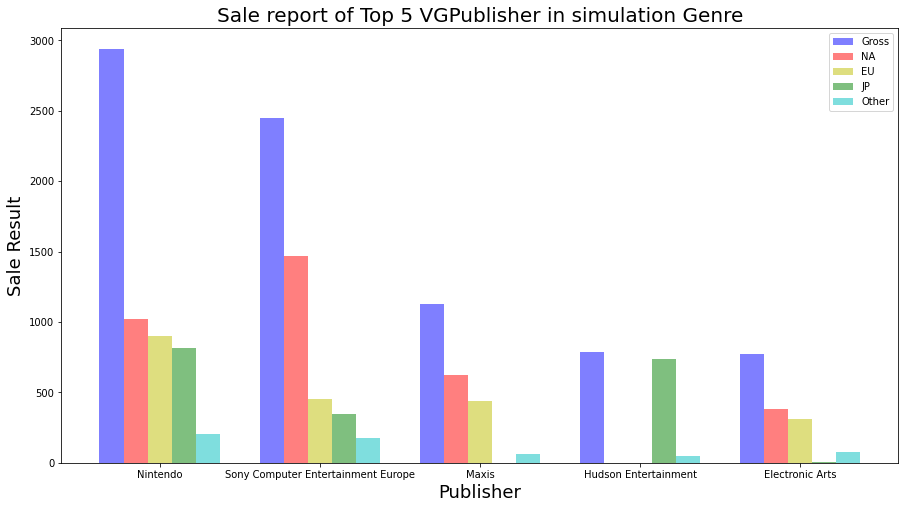

In [44]:
#visualize to decide which publisher should we choose
label = choose_pub.index[:5]
index = np.arange(len(label))
alpha = 0.5
bar_width = 0.15

plt.figure(figsize=(15, 8)) 
plt.bar(index - 2 * bar_width, choose_pub.Gross_Sales.iloc[0:5],bar_width, color = 'b',
        alpha = alpha, label = 'Gross')
plt.bar(index - 1 * bar_width, choose_pub.NA_Sales.iloc[0:5],bar_width, color = 'r',
        alpha = alpha, label = 'NA')
plt.bar(index, choose_pub.EU_Sales.iloc[0:5],bar_width, color = 'y',
        alpha = alpha, label = 'EU')
plt.bar(index + bar_width, choose_pub.JP_Sales.iloc[0:5],bar_width, color = 'g',
        alpha = alpha, label = 'JP')
plt.bar(index + 2 * bar_width, choose_pub.Other_Sales.iloc[0:5],bar_width, color = 'c',
        alpha = alpha, label = 'Other')

plt.title('Sale report of Top 5 VGPublisher in simulation Genre', fontsize = 20)
plt.xlabel('Publisher', fontsize = 18)
plt.ylabel('Sale Result', fontsize = 18)
plt.xticks(index, label,fontsize = 10)
plt.legend()
plt.show()